In [1]:
from ema_workbench import load_results
from SALib.analyze import sobol
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from vadere_ema_formulations import get_vadere_formulation


/home/tevito/anaconda3/envs/CrowdSim/lib/python3.10/site-packages/ema_workbench-2.1.3-py3.10.egg/ema_workbench/connectors/__init__.py:19: ImportWarning: vensim connector not available
  warnings.warn("vensim connector not available", ImportWarning)
<frozen importlib._bootstrap>:914: ImportWarning: ShimImporter.find_spec() not found; falling back to find_module()
/home/tevito/anaconda3/envs/CrowdSim/lib/python3.10/site-packages/ema_workbench-2.1.3-py3.10.egg/ema_workbench/connectors/__init__.py:29: ImportWarning: netlogo connector not available
  warnings.warn("netlogo connector not available", ImportWarning)
/home/tevito/anaconda3/envs/CrowdSim/lib/python3.10/site-packages/ema_workbench-2.1.3-py3.10.egg/ema_workbench/connectors/__init__.py:34: ImportWarning: simio connector not available
  warnings.warn("simio connector not available", ImportWarning)


In [2]:
model = get_vadere_formulation(
    id=1,
    replications=1,
    model_file='baseCaseData.scenario'
)

In [3]:
experiments, outcomes = load_results('../data/output/EMA/sobol.tar.gz')

<frozen importlib._bootstrap>:914: ImportWarning: ShimImporter.find_spec() not found; falling back to find_module()


In [4]:
def get_sobol_results(outcome, name):
    problem = get_SALib_problem(model.uncertainties)
    Si = sobol.analyze(problem, outcomes[outcome],
                   calc_second_order=True, print_to_console=False)
    print(Si)
    
    scores_filtered = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
    Si_df = pd.DataFrame(scores_filtered, index=problem['names'])

    sns.set_style('white')
    fig, ax = plt.subplots(1)

    indices = Si_df[['S1','ST']]
    err = Si_df[['S1_conf','ST_conf']]

    indices.plot.bar(yerr=err.values.T,ax=ax).legend(loc="upper left", prop={'size': 20})
    fig.set_size_inches(8,6)
    fig.subplots_adjust(bottom=0.3)
    ax.set_xlabel('Variable', fontsize=28)
    ax.set_ylabel('Indices', fontsize=28)
    plt.xticks(fontsize=18, weight="bold")
    plt.title(outcome, fontsize=28)
    plt.savefig('../figures/sobol{}{}'.format(name, '.png'), bbox_inches="tight")

In [5]:
def get_sobol_convergence(outcome, n_exp):
    problem = get_SALib_problem(model.uncertainties)
    s_data = pd.DataFrame(index=problem['names'],
                        columns=np.arange(20,n_exp,50)*(2*problem['num_vars']+2))
    for j in s_data.columns:
        scores = sobol.analyze(problem, outcomes[outcome][0:j], calc_second_order=True, print_to_console=False)
        s_data.loc[:,j] = scores['ST']
    fig, ax = plt.subplots(1)

    s_data.T.plot(ax=ax)
    ax.set_xlabel('Samples')
    ax.set_ylabel('Total index (ST)')
    plt.show()

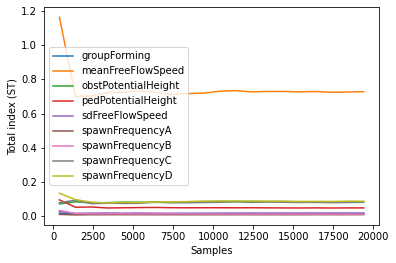

In [6]:
get_sobol_convergence('meanSpeed', 1000)

In [7]:
variables = ['meanSpeed',
            'meanDensityArea1',
            'maxDensityArea1',
            'meanDensityArea2',
            'maxDensityArea2',
            'meanDensityArea3',
            'maxDensityArea3',
            'meanDensityArea4',
            'maxDensityArea4',
            ]

{'S1': array([ 6.39672440e-03,  6.97736652e-01,  6.97155683e-02,  3.92452206e-02,
       -4.31540314e-04, -4.01036903e-03,  1.80562684e-03,  6.18460663e-02,
        6.46384398e-02]), 'S1_conf': array([0.01003409, 0.07106928, 0.02515735, 0.01630867, 0.01066504,
       0.00665432, 0.00892409, 0.02351659, 0.0265504 ]), 'ST': array([0.01449429, 0.72693612, 0.08224834, 0.04710112, 0.01754878,
       0.00785441, 0.01089402, 0.08013186, 0.08725619]), 'ST_conf': array([0.00141745, 0.05771849, 0.00949592, 0.00488528, 0.00178776,
       0.00085029, 0.00162859, 0.01142043, 0.01085397]), 'S2': array([[        nan, -0.00044423,  0.0031472 ,  0.00143176,  0.00123105,
         0.00185738,  0.00192867,  0.00138661,  0.00134732],
       [        nan,         nan, -0.01452014, -0.01411159, -0.00068603,
        -0.0070592 , -0.01129229, -0.01569568, -0.0003    ],
       [        nan,         nan,         nan, -0.00023456, -0.00085458,
        -0.00259429, -0.00123193,  0.00072003, -0.00326118],
       [ 

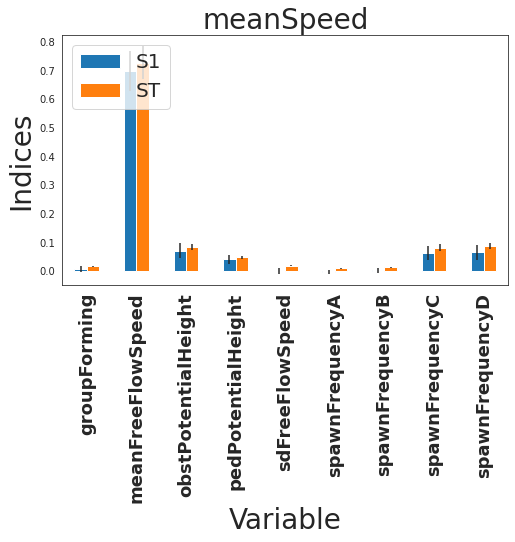

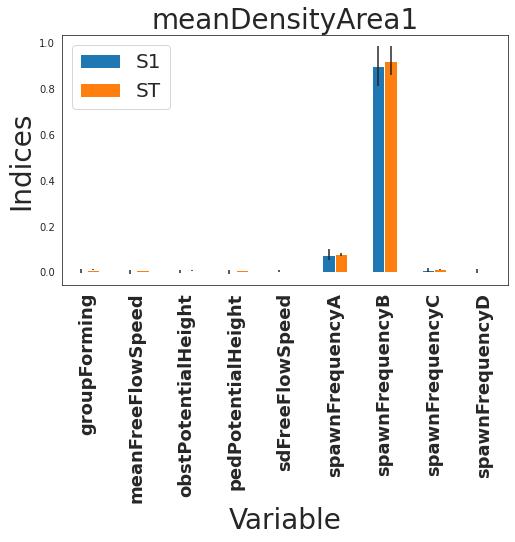

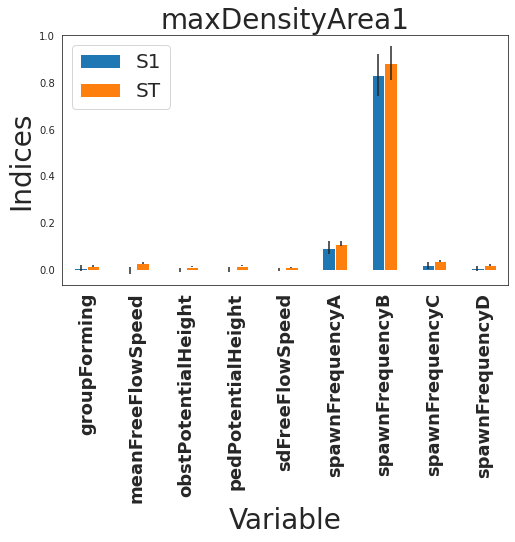

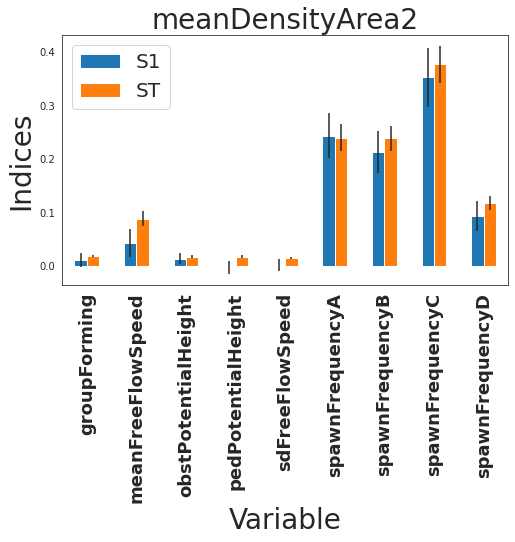

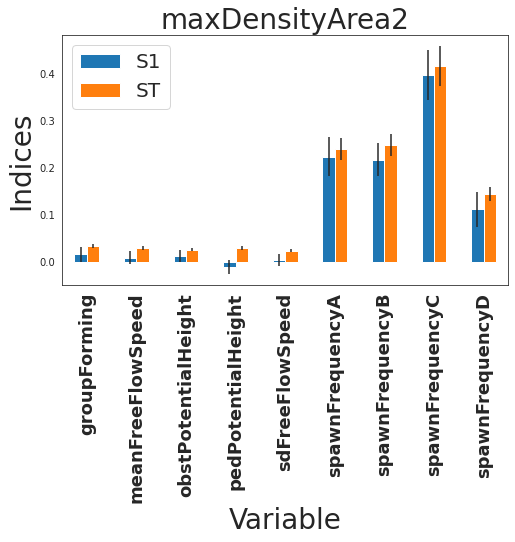

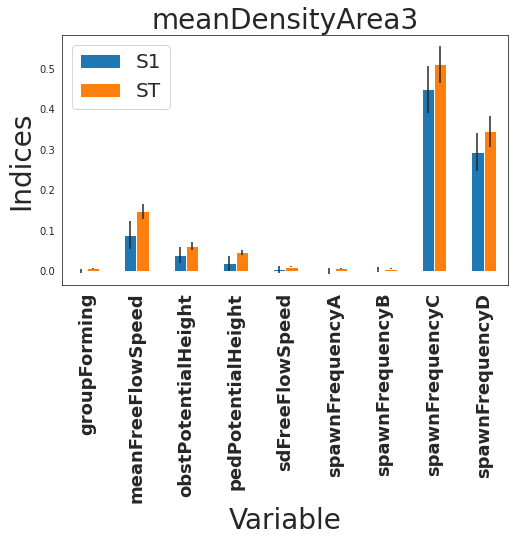

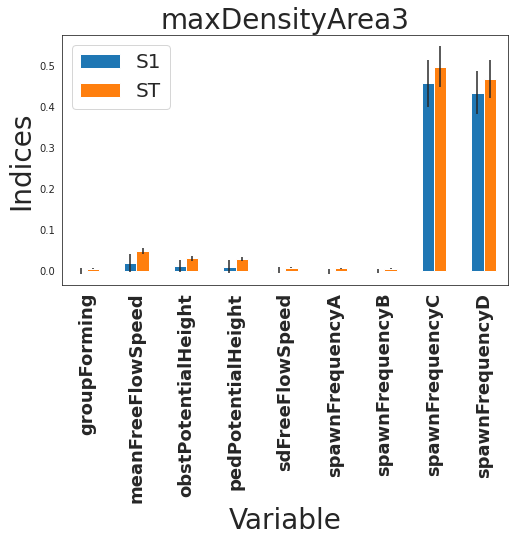

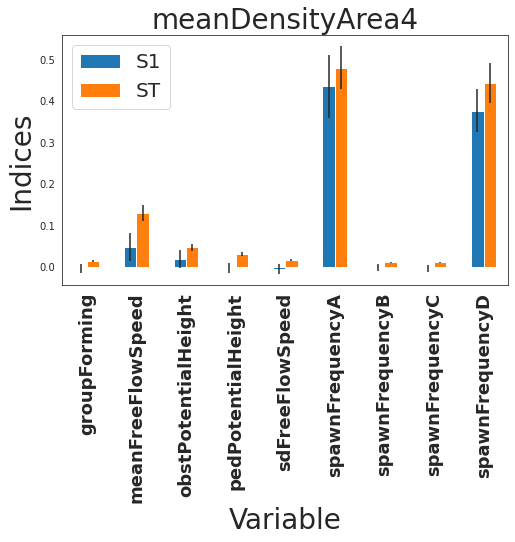

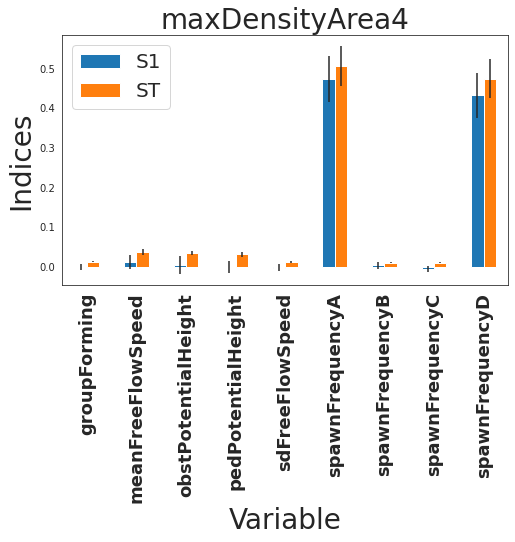

In [8]:
for i in variables:
    get_sobol_results(i, i[0].upper() +  i[1:])